<a href="https://colab.research.google.com/github/dvanegasp1/davanegasp1/blob/main/RutasCarreraGrafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyvis
from IPython.core.display import display, HTML
from pyvis import network
import pyvis.network as net
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from pyvis.network import Network
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.2 MB/s eta 0:00:00


In [ ]:
archivo= pd.read_excel('/content/rutas_DITAH.xlsx', sheet_name='RELACIONES')
archivo

,ID_RUTA,DES_CARGO,PREF-OF,GR_CARGO,RUTA FINAL,RELACION,GRADO RELACION,GR_CARGO_RELACION,VALIDACION,UNIDAD DUEÑA,Unnamed: 10
0,1,INICIO RUTA ESPECIALIZADA GENERAL,TE,TE INICIO RUTA ESPECIALIZADA GENERAL,RUTA ESPECIALIZADA GENERAL,RESPONSABLE PROCEDIMIENTOS DE PERSONAL 1,TE,TE RESPONSABLE PROCEDIMIENTOS DE PERSONAL 1,TE INICIO RUTA ESPECIALIZADA GENERAL TE RESPON...,DITAH,bien
1,1,INICIO RUTA ESPECIALIZADA GENERAL,TE,TE INICIO RUTA ESPECIALIZADA GENERAL,RUTA ESPECIALIZADA GENERAL,RESPONSABLE COORDINACION SERVICIO MILITAR Y RE...,TE,TE RESPONSABLE COORDINACION SERVICIO MILITAR Y...,TE INICIO RUTA ESPECIALIZADA GENERAL TE RESPON...,DITAH,bien
2,1,RESPONSABLE COORDINACION SERVICIO MILITAR Y RE...,TE,TE RESPONSABLE COORDINACION SERVICIO MILITAR Y...,RUTA ESPECIALIZADA GENERAL,RESPONSABLE PROCEDIMIENTOS DE PERSONAL 1,TE,TE RESPONSABLE PROCEDIMIENTOS DE PERSONAL 1,TE RESPONSABLE COORDINACION SERVICIO MILITAR Y...,DITAH,bien
3,1,RESPONSABLE COORDINACION SERVICIO MILITAR Y RE...,TE,TE RESPONSABLE COORDINACION SERVICIO MILITAR Y...,RUTA ESPECIALIZADA GENERAL,RESPONSABLE PROCEDIMIENTOS DE PERSONAL 2,CT,CT RESPONSABLE PROCEDIMIENTOS DE PERSONAL 2,TE RESPONSABLE COORDINACION SERVICIO MILITAR Y...,DITAH,bien
4,1,RESPONSABLE COORDINACION SERVICIO MILITAR Y RE...,TE,TE RESPONSABLE COORDINACION SERVICIO MILITAR Y...,RUTA ESPECIALIZADA GENERAL,JEFE GRUPO TALENTO HUMANO 1,CT,CT JEFE GRUPO TALENTO HUMANO 1,TE RESPONSABLE COORDINACION SERVICIO MILITAR Y...,DITAH,bien
...,...,...,...,...,...,...,...,...,...,...,...
2058,1,INICIO RUTA MODELO SERV. POLICIA,ST,ST INICIO RUTA MODELO SERV. POLICIA,RUTA MODELO SERV. POLICIA,COMANDANTE ESTACION DE POLICIA-Estación Tipo E,ST,ST COMANDANTE ESTACION DE POLICIA-Estación Tipo E,ST INICIO RUTA MODELO SERV. POLICIA ST COMANDA...,DISEC,bien
2059,1,INICIO RUTA MODELO SERV. POLICIA,ST,ST INICIO RUTA MODELO SERV. POLICIA,RUTA MODELO SERV. POLICIA,COMANDANTE GRUPO FUERZA DISPONIBLE 1,ST,ST COMANDANTE GRUPO FUERZA DISPONIBLE 1,ST INICIO RUTA MODELO SERV. POLICIA ST COMANDA...,DISEC,bien
2060,1,INICIO RUTA MODELO SERV. POLICIA,ST,ST INICIO RUTA MODELO SERV. POLICIA,RUTA MODELO SERV. POLICIA,COMANDANTE SECCION DE VIGILANCIA,ST,ST COMANDANTE SECCION DE VIGILANCIA,ST INICIO RUTA MODELO SERV. POLICIA ST COMANDA...,DISEC,bien
2061,1,INICIO RUTA MODELO SERV. POLICIA,ST,ST INICIO RUTA MODELO SERV. POLICIA,RUTA MODELO SERV. POLICIA,COMANDANTE SECCION FUERZA DISPONIBLE,ST,ST COMANDANTE SECCION FUERZA DISPONIBLE,ST INICIO RUTA MODELO SERV. POLICIA ST COMANDA...,DISEC,bien


In [ ]:
archivo1= pd.read_excel('/content/rutas_DITAH.xlsx', sheet_name='COLORES')
archivo1

,PREF-OF,SIGLA_GRADO,COLOR,RGB
0,SUBTENIENTE,ST,#C8C850,NaN
1,TENIENTE,TE,#D28C46,NaN
2,CAPITAN,CT,#63AD7C,NaN
3,MAYOR,MY,#32E643,NaN
4,TENIENTE CORONEL,TC,#BC1A1A,NaN
5,CORONEL,CR,#573593,NaN
6,BRIGADIER GENERAL,BG,#2B8F9D,NaN
7,MAYOR GENERAL,MG,#0A35BE,NaN


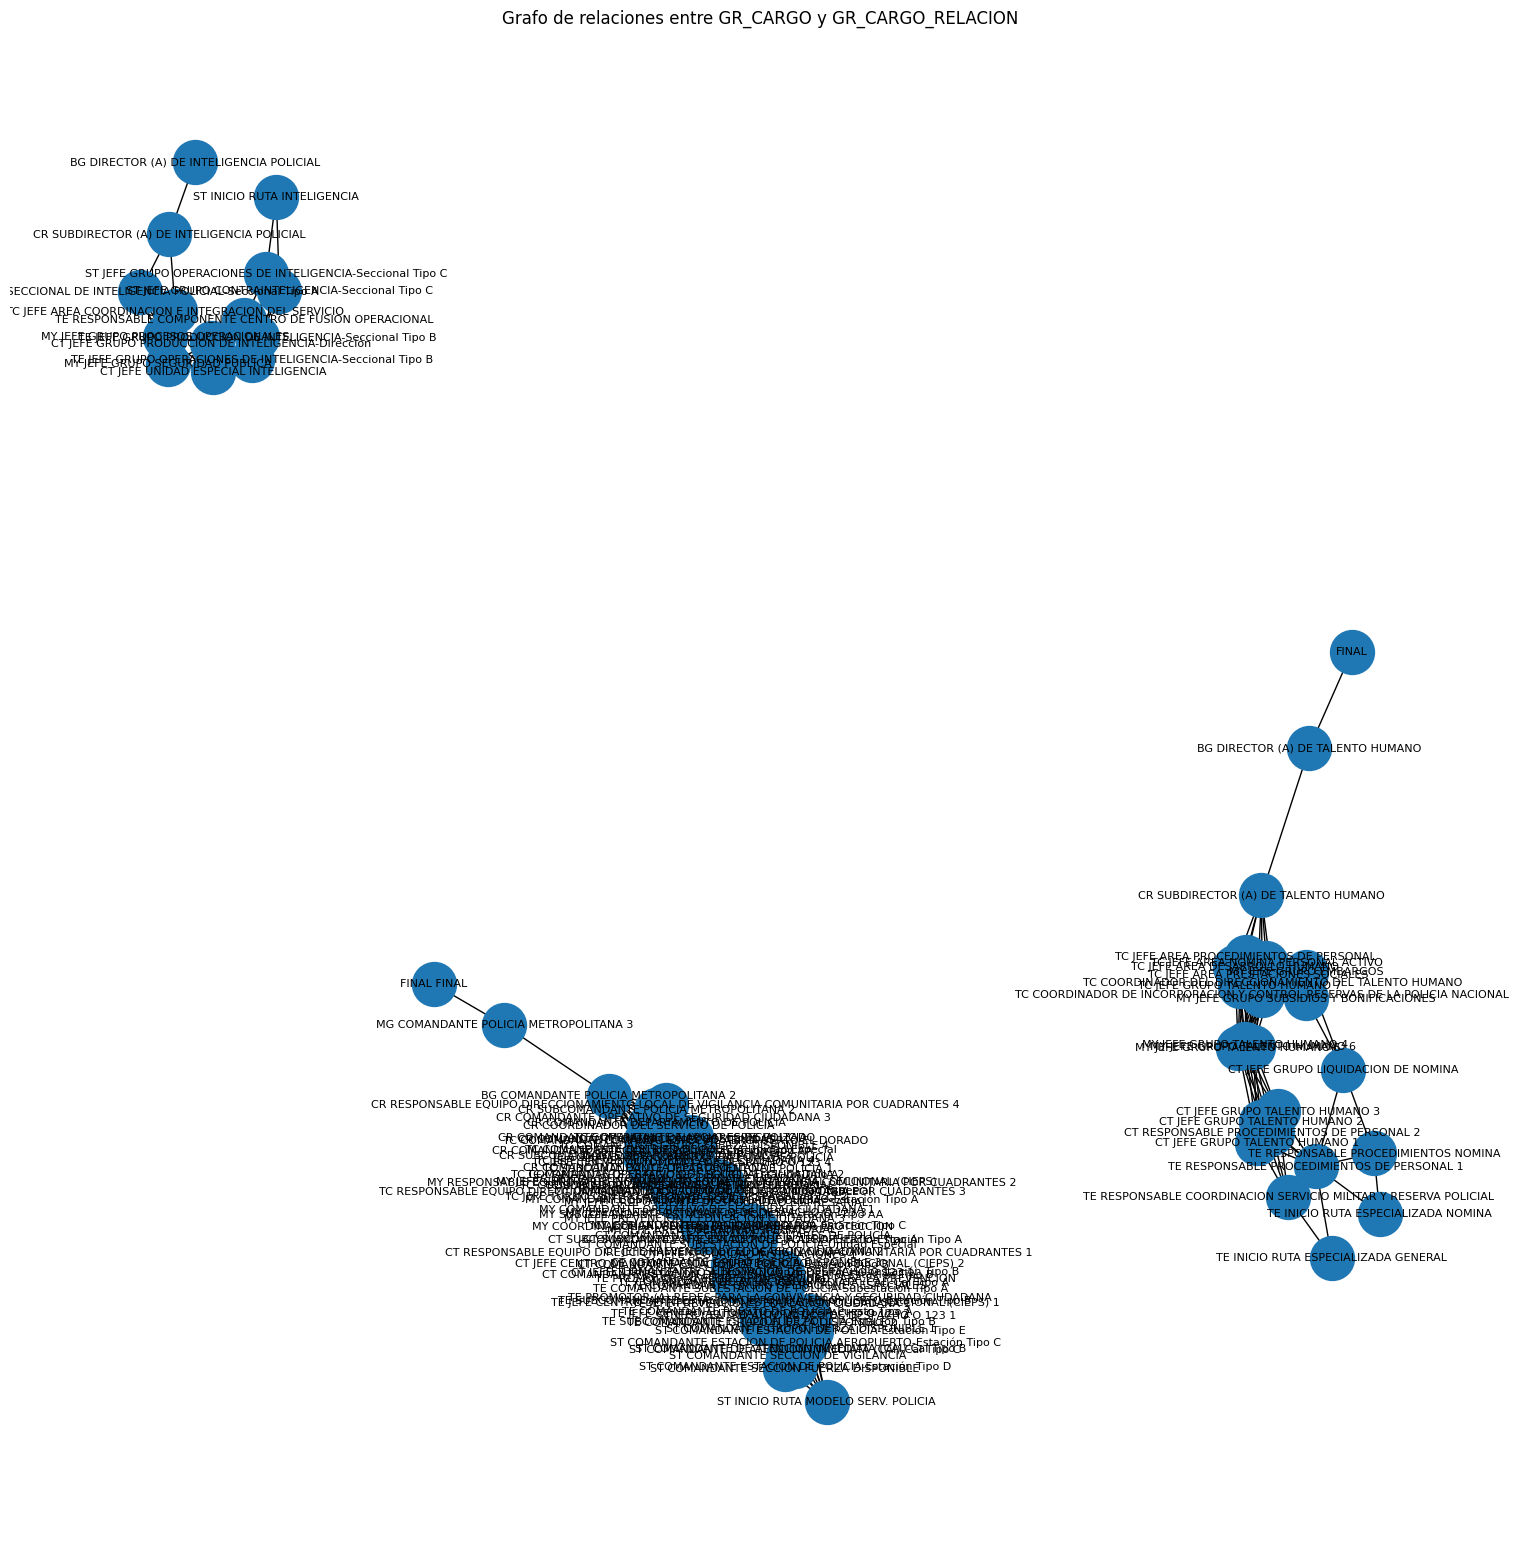

In [ ]:
# Assuming 'archivo' is your DataFrame and it contains 'GR_CARGO' and 'GR_CARGO_RELACION' columns

# Create an empty graph
graph = nx.Graph()

# Iterate through the DataFrame and add edges based on GR_CARGO and GR_CARGO_RELACION
for index, row in archivo.iterrows():
  cargo = row['GR_CARGO']
  cargo_relacion = row['GR_CARGO_RELACION']
  if pd.notna(cargo) and pd.notna(cargo_relacion):
    graph.add_edge(cargo, cargo_relacion)

# Visualize the graph
plt.figure(figsize=(15, 15))
nx.draw(graph, with_labels=True, node_size=1000, font_size=8)
plt.title("Grafo de relaciones entre GR_CARGO y GR_CARGO_RELACION")
plt.show()

In [ ]:
def create_interactive_graph(df, source_col, target_col):
    """Crea una visualización interactiva de un grafo a partir de un DataFrame."""
    graph = nx.Graph()

    # Iterar a través del DataFrame y agregar aristas basadas en las columnas source y target
    for index, row in df.iterrows():
        source = row[source_col]
        target = row[target_col]
        if pd.notna(source) and pd.notna(target):
            graph.add_edge(source, target)

    # Crear un objeto de red PyVis
    nt = Network(notebook=True, width="150%", height="1500px", cdn_resources='remote')

    # Configuración adicional para la estabilidad de los nodos
    nt.toggle_physics(True)  # Desactiva la física por defecto para evitar movimientos excesivos

    # Mostrar botones para la configuración de física
    nt.show_buttons(filter_=['physics'])


    # Población de la red PyVis con datos del grafo de networkx
    nt.from_nx(graph)

    return nt

# Asumiendo que 'archivo' es tu DataFrame
nt = create_interactive_graph(archivo, 'GR_CARGO', 'GR_CARGO_RELACION')
# Mostrar el grafo
nt.show("mygraph.html")
display(HTML("mygraph.html"))

mygraph.html


In [ ]:
# realice una relacion en grafos sobre la columna GR_CARGO Y GR_CARGO_RELACION del dataset 'archivo', genere una frafica de visualizacion del grafo, de igual manera agrege la columna 'PREF-OF' como atributo de cada nodo y agregele un color a cada grado de la siguiente manera:
# ST=white, TE=Red, CT=Blue, MY=Green, TC=Yellow, CR=Orange, BG=Purple, MG=magenta
# asocie cada grado de 'PREF-OF' como atributo a 'GR_CARGO',  y pinte el nodo de acuerdo al color del grado

# Assuming 'archivo' is your DataFrame and it contains 'GR_CARGO', 'GR_CARGO_RELACION', and 'PREF-OF' columns

# Create an empty graph
graph = nx.Graph()

# Iterate through the DataFrame and add edges based on GR_CARGO and GR_CARGO_RELACION
for index, row in archivo.iterrows():
  cargo = row['GR_CARGO']
  cargo_relacion = row['GR_CARGO_RELACION']
  pref_of = row['PREF-OF']  # Get the 'PREF-OF' value for the edge
  if pd.notna(cargo) and pd.notna(cargo_relacion):
    graph.add_edge(cargo, cargo_relacion, pref_of=pref_of)  # Add edge with 'PREF-OF' attribute

# Create a PyVis network
nt = Network(notebook=True, width="100%", height="750px", cdn_resources='in_line', select_menu=True, filter_menu=True)
nt.from_nx(graph)


# Define a color mapping for 'PREF-OF' grades
color_map = {
    'ST': '#C8C850',
    'TE': '#D28C46',
    'CT': '#63AD7C',
    'MY': '#32E643',
    'TC': '#BC1A1A',
    'CR': '#573593',
    'BG': '#2B8F9D',
    'MG': '#0A35BE',
}

# Mostrar botones para la configuración de física
nt.show_buttons(filter_=['physics'])
# Iterate through the nodes and set their color based on 'PREF-OF' grade
for node in nt.nodes:
  cargo = node['id']
  if cargo in archivo['GR_CARGO'].values:
    pref_of_value = archivo.loc[archivo['GR_CARGO'] == cargo, 'PREF-OF'].iloc[0]
    if pd.notna(pref_of_value):
      node_color = color_map.get(pref_of_value, 'gray')  # Default to gray if grade not found
      node['color'] = node_color
      node['title'] = f"Cargo: {cargo}, Grado: {pref_of_value}"
      node['value'] = 10


# Show the interactive graph
nt.show("mygraph.html")
display(HTML("mygraph.html"))

mygraph.html
